# AI 모델링 과정 썸머 캠프 컴페티션

## - 호 과장과 함께하는 제품 결함 예측  

### 필요한 모듈 import 및 데이터 로드

In [160]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")

data_train = pd.read_csv("./train.csv")
data_train

,Label,v001,v002,v003,v004,v005,v006,v007,v008,v009,...,v581,v582,v583,v584,v585,v586,v587,v588,v589,v590
0,normal,2872.0667,2466.5526,2125.6577,989.1645,-2.7843,100.0,101.4519,0.1211,1.5088,...,NaN,NaN,0.5026,0.0152,0.0036,3.0002,0.0235,0.0214,0.0068,201.6557
1,normal,2925.8098,2541.5765,2234.0984,1281.4768,-3.0935,100.0,102.7180,0.1217,1.4794,...,NaN,NaN,0.5028,0.0148,0.0039,2.9137,0.0178,0.0086,0.0019,22.1478
2,normal,2985.1397,2434.9879,2114.9636,984.9040,-2.3782,100.0,104.8891,0.1280,1.3588,...,NaN,NaN,0.4963,0.0094,0.0032,1.8878,0.0289,0.0153,0.0053,38.0891
3,normal,3205.5703,2354.2453,2156.7551,2348.6859,-2.2280,100.0,92.2493,0.1256,1.4360,...,0.0005,NaN,0.4980,0.0180,0.0046,3.5536,0.0140,0.0150,0.0060,210.6087
4,normal,3065.9593,2543.6703,2180.5305,1190.3008,-2.2051,100.0,101.0354,0.1260,1.5015,...,0.0029,NaN,0.5024,0.0132,0.0032,2.6338,0.0259,0.0114,0.0046,45.1529
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,normal,3073.6235,2464.5108,2183.0635,1508.1410,-1.6021,100.0,114.2602,0.1264,1.5427,...,NaN,47.8519,0.5001,0.0134,0.0039,2.6179,0.0379,0.0189,0.0070,15.8010
4996,normal,2989.2867,2548.8768,NaN,1473.5335,-2.6517,100.0,90.8404,0.1220,1.3980,...,NaN,64.4370,0.4982,0.0131,0.0037,2.6311,0.0395,0.0383,0.0133,56.1007
4997,normal,2958.9100,2460.1900,2191.5667,1448.8757,0.9187,100.0,104.4511,0.1261,1.4482,...,0.0047,276.8808,0.4990,0.0139,0.0037,2.7790,0.0050,0.0138,0.0047,276.8808
4998,normal,3005.3800,2462.1074,2227.6460,1366.8149,-3.2245,100.0,98.1569,0.1206,1.5381,...,0.0026,NaN,0.4944,0.0107,0.0030,2.1679,0.0198,0.0099,0.0027,33.9691


### 탐색적 데이터 분석 (EDA)
- 전체적인 데이터의 분포 및 여러 가지 통계량을 확인하기 위해 탐색적 데이터 분석을 진행합니다.

In [161]:
train_summary = data_train.describe()
train_summary

,v001,v002,v003,v004,v005,v006,v007,v008,v009,v010,...,v581,v582,v583,v584,v585,v586,v587,v588,v589,v590
count,4983.000000,4977.000000,4947.000000,4953.000000,4949.000000,4954.0,4953.000000,4965.00000,4995.000000,4993.000000,...,1982.000000,1944.000000,4995.000000,5000.000000,4996.00000,4999.000000,4998.000000,4997.000000,4999.000000,4998.000000
mean,3014.925637,2496.168685,2200.488519,1395.656308,4.567102,100.0,101.128535,0.12170,1.462347,-0.000757,...,0.005325,96.645631,0.500093,0.015126,0.00381,3.028681,0.021430,0.016409,0.005265,100.037865
std,73.478340,80.948330,29.673972,442.039204,57.619818,0.0,6.355055,0.00944,0.074234,0.015090,...,0.002966,83.048485,0.003398,0.016186,0.00350,3.370154,0.012584,0.008863,0.002887,96.104726
min,2743.240000,2162.870000,2060.660000,300.156600,-3.589900,100.0,72.388200,0.00000,1.210500,-0.050400,...,-0.000400,-52.443200,0.485300,0.001000,0.00100,0.188300,-0.021300,-0.006000,-0.001800,-71.188000
25%,2965.228800,2446.083400,2181.523850,1084.650200,-2.862100,100.0,97.106600,0.12180,1.412750,-0.010800,...,0.003500,46.816125,0.497900,0.010500,0.00290,2.101300,0.013100,0.010100,0.003200,32.472900
50%,3012.533300,2496.102100,2201.095400,1326.827500,-2.365400,100.0,101.351100,0.12310,1.461300,-0.001100,...,0.004500,70.403350,0.500100,0.013300,0.00350,2.643600,0.020600,0.015300,0.004900,77.883850
75%,3060.759650,2546.749900,2219.558500,1639.759100,-1.779900,100.0,105.138200,0.12450,1.513500,0.008800,...,0.006500,118.947875,0.502400,0.016600,0.00410,3.306600,0.028200,0.021300,0.006900,145.344400
max,3342.581200,2872.557000,2315.266700,3715.041700,1112.076900,100.0,129.252200,0.12950,1.719800,0.060900,...,0.028600,706.824000,0.511900,0.233900,0.05120,48.684900,0.102800,0.079900,0.028600,737.304800


In [3]:
# 전체 데이터 샘플 및 변수의 수 확인
print(f"> 전체 샘플의 수: {data_train.shape[0]} / 변수의 수: {data_train.shape[1] - 1}")  # 변수의 수는 Label을 포함하지 않기 때문에 -1

# 정상 데이터 샘플의 수와 결함 데이터 샘플의 수
num_normal, num_defect = np.sum(data_train["Label"] == "normal"), np.sum(data_train["Label"] == "defect")
print(f"> 정상 샘플의 수: {num_normal} / 결함 샘플의 수: {num_defect}")

# Missing value (NA)를 가지는 변수 및 샘플 확인
na_info = data_train.isnull()
var_na_info = np.any(na_info, axis=0)
sample_na_info = np.any(na_info, axis=1)
print(f"> Missing data를 가진 변수의 수: {np.sum(var_na_info)} / Missing data를 가진 샘플의 수: {np.sum(sample_na_info)}")

# 모든 데이터 샘플이 같은 값을 갖는 변수의 수 (즉, 분산과 표준편차가 0인 변수의 수)
print(f"> 분산이 0인 변수의 수: {np.sum(train_summary.loc['std'] == 0.0)}")

> 전체 샘플의 수: 5000 / 변수의 수: 590
> 정상 샘플의 수: 4697 / 결함 샘플의 수: 303
> Missing data를 가진 변수의 수: 533 / Missing data를 가진 샘플의 수: 5000
> 분산이 0인 변수의 수: 116


<Axes: >

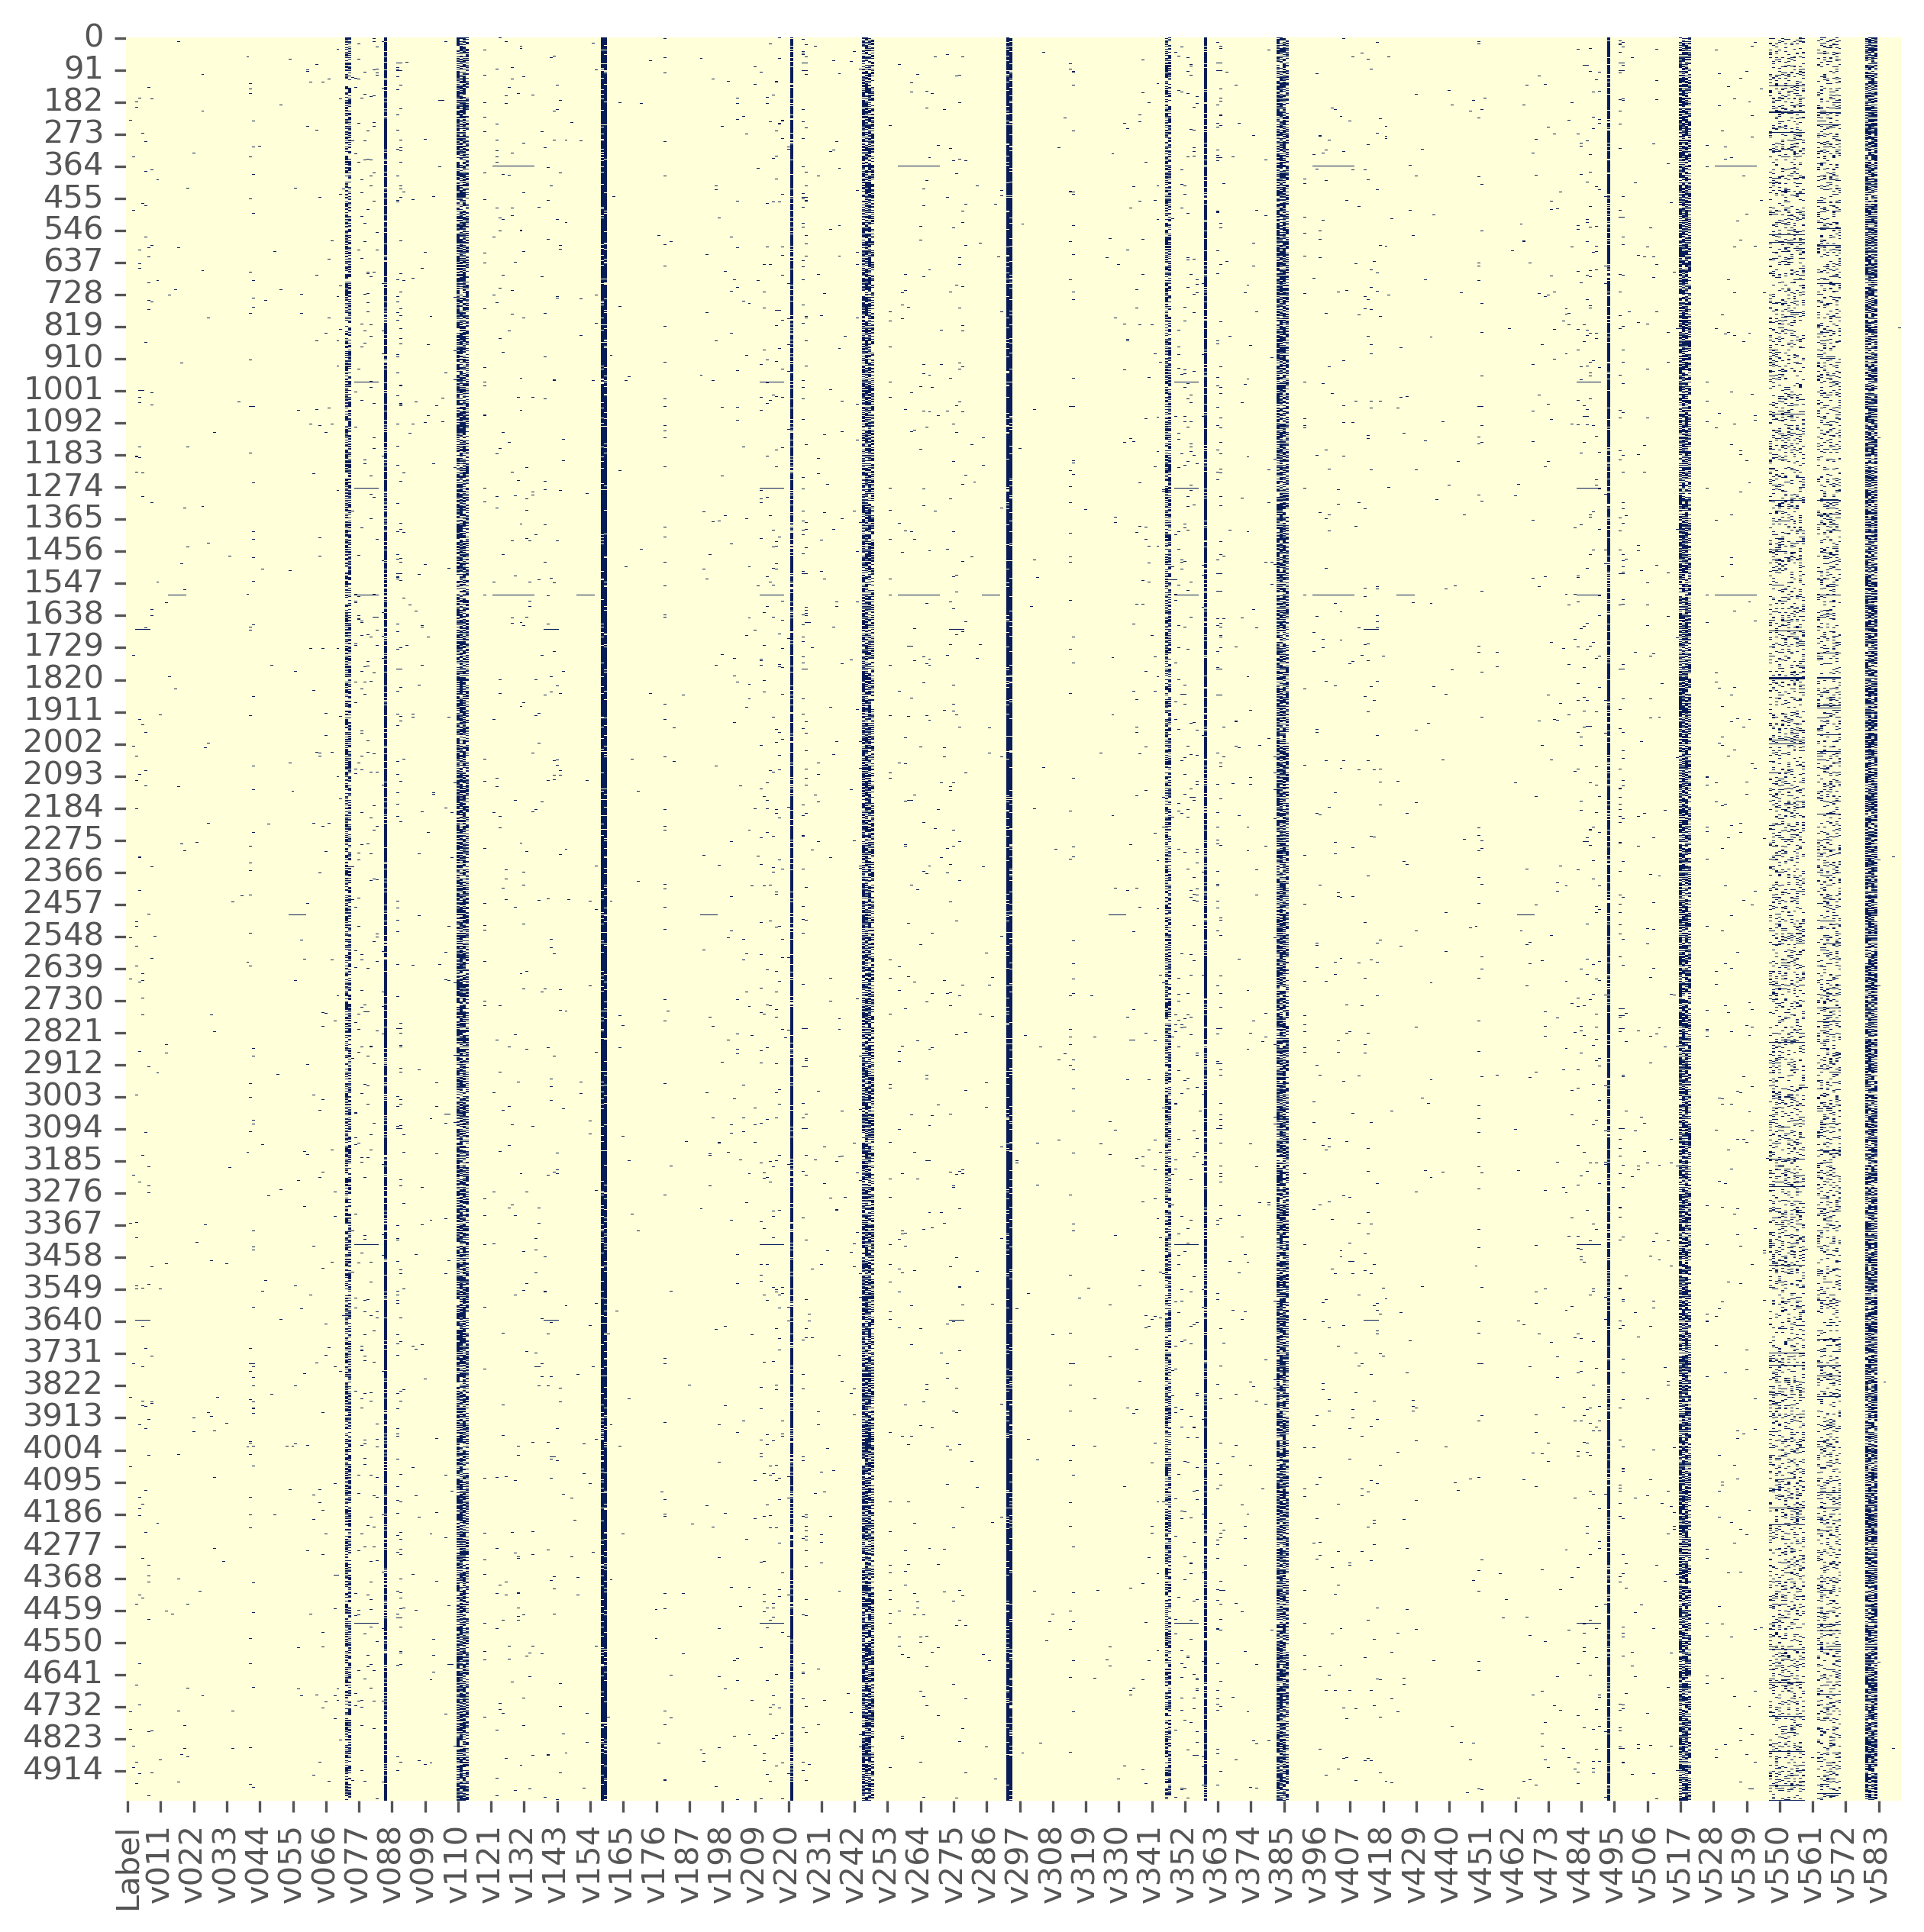

In [4]:
# Missing value의 위치와 수를 시각화하여 알려주는 히트맵 도식화 (파란색: Missing value)
plt.figure(figsize=(10, 10), dpi=300)
sns.heatmap(data_train.isnull(), cbar=False, cmap="YlGnBu")

### 데이터 전처리
- 데이터 전처리는 다음과 같은 순서로 진행됩니다.  
> 1) 중요하게 걸러내고자 하는 defect는 1, normal은 0으로 인코딩  
> 2) 분산이 0인, 모든 샘플이 같은 값을 가지는 변수들 제거  
> 3) 각 변수별 missing value 처리  
>> - 전체 샘플에서 10퍼센트에 해당하는 수만큼 missing value를 가지는 변수는 제거  
>> - 나머지 missing value는 각 변수의 평균값으로 대체  

In [162]:
# 1. defect는 1, normal은 0으로 인코딩
data_train_pre = data_train.iloc[:, 1:]
data_train_pre["Target"] = data_train["Label"].map(lambda x: 1 if x == "defect" else 0)
data_train_pre

,v001,v002,v003,v004,v005,v006,v007,v008,v009,v010,...,v582,v583,v584,v585,v586,v587,v588,v589,v590,Target
0,2872.0667,2466.5526,2125.6577,989.1645,-2.7843,100.0,101.4519,0.1211,1.5088,-0.0097,...,NaN,0.5026,0.0152,0.0036,3.0002,0.0235,0.0214,0.0068,201.6557,0
1,2925.8098,2541.5765,2234.0984,1281.4768,-3.0935,100.0,102.7180,0.1217,1.4794,-0.0188,...,NaN,0.5028,0.0148,0.0039,2.9137,0.0178,0.0086,0.0019,22.1478,0
2,2985.1397,2434.9879,2114.9636,984.9040,-2.3782,100.0,104.8891,0.1280,1.3588,0.0228,...,NaN,0.4963,0.0094,0.0032,1.8878,0.0289,0.0153,0.0053,38.0891,0
3,3205.5703,2354.2453,2156.7551,2348.6859,-2.2280,100.0,92.2493,0.1256,1.4360,-0.0083,...,NaN,0.4980,0.0180,0.0046,3.5536,0.0140,0.0150,0.0060,210.6087,0
4,3065.9593,2543.6703,2180.5305,1190.3008,-2.2051,100.0,101.0354,0.1260,1.5015,-0.0236,...,NaN,0.5024,0.0132,0.0032,2.6338,0.0259,0.0114,0.0046,45.1529,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,3073.6235,2464.5108,2183.0635,1508.1410,-1.6021,100.0,114.2602,0.1264,1.5427,-0.0142,...,47.8519,0.5001,0.0134,0.0039,2.6179,0.0379,0.0189,0.0070,15.8010,0
4996,2989.2867,2548.8768,NaN,1473.5335,-2.6517,100.0,90.8404,0.1220,1.3980,0.0088,...,64.4370,0.4982,0.0131,0.0037,2.6311,0.0395,0.0383,0.0133,56.1007,0
4997,2958.9100,2460.1900,2191.5667,1448.8757,0.9187,100.0,104.4511,0.1261,1.4482,-0.0321,...,276.8808,0.4990,0.0139,0.0037,2.7790,0.0050,0.0138,0.0047,276.8808,0
4998,3005.3800,2462.1074,2227.6460,1366.8149,-3.2245,100.0,98.1569,0.1206,1.5381,-0.0076,...,NaN,0.4944,0.0107,0.0030,2.1679,0.0198,0.0099,0.0027,33.9691,0


In [170]:
max(data_train_pre.isna().sum())

4567

In [169]:
# 2. 분산이 0인, 모든 샘플이 같은 값을 가지는 변수들 제거
data_train_pre = data_train_pre.loc[:, data_train_pre.std() != 0.0]
data_train_pre

,v001,v002,v003,v004,v005,v007,v008,v009,v010,v011,...,v582,v583,v584,v585,v586,v587,v588,v589,v590,Target
0,2872.0667,2466.5526,2125.6577,989.1645,-2.7843,101.4519,0.1211,1.5088,-0.0097,-0.0038,...,NaN,0.5026,0.0152,0.0036,3.0002,0.0235,0.0214,0.0068,201.6557,0
1,2925.8098,2541.5765,2234.0984,1281.4768,-3.0935,102.7180,0.1217,1.4794,-0.0188,0.0031,...,NaN,0.5028,0.0148,0.0039,2.9137,0.0178,0.0086,0.0019,22.1478,0
2,2985.1397,2434.9879,2114.9636,984.9040,-2.3782,104.8891,0.1280,1.3588,0.0228,-0.0053,...,NaN,0.4963,0.0094,0.0032,1.8878,0.0289,0.0153,0.0053,38.0891,0
3,3205.5703,2354.2453,2156.7551,2348.6859,-2.2280,92.2493,0.1256,1.4360,-0.0083,0.0032,...,NaN,0.4980,0.0180,0.0046,3.5536,0.0140,0.0150,0.0060,210.6087,0
4,3065.9593,2543.6703,2180.5305,1190.3008,-2.2051,101.0354,0.1260,1.5015,-0.0236,-0.0029,...,NaN,0.5024,0.0132,0.0032,2.6338,0.0259,0.0114,0.0046,45.1529,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,3073.6235,2464.5108,2183.0635,1508.1410,-1.6021,114.2602,0.1264,1.5427,-0.0142,-0.0035,...,47.8519,0.5001,0.0134,0.0039,2.6179,0.0379,0.0189,0.0070,15.8010,0
4996,2989.2867,2548.8768,NaN,1473.5335,-2.6517,90.8404,0.1220,1.3980,0.0088,-0.0211,...,64.4370,0.4982,0.0131,0.0037,2.6311,0.0395,0.0383,0.0133,56.1007,0
4997,2958.9100,2460.1900,2191.5667,1448.8757,0.9187,104.4511,0.1261,1.4482,-0.0321,0.0048,...,276.8808,0.4990,0.0139,0.0037,2.7790,0.0050,0.0138,0.0047,276.8808,0
4998,3005.3800,2462.1074,2227.6460,1366.8149,-3.2245,98.1569,0.1206,1.5381,-0.0076,0.0022,...,NaN,0.4944,0.0107,0.0030,2.1679,0.0198,0.0099,0.0027,33.9691,0


Missing value가 500개 (전체의 10%)보다 많은 변수의 수: 52


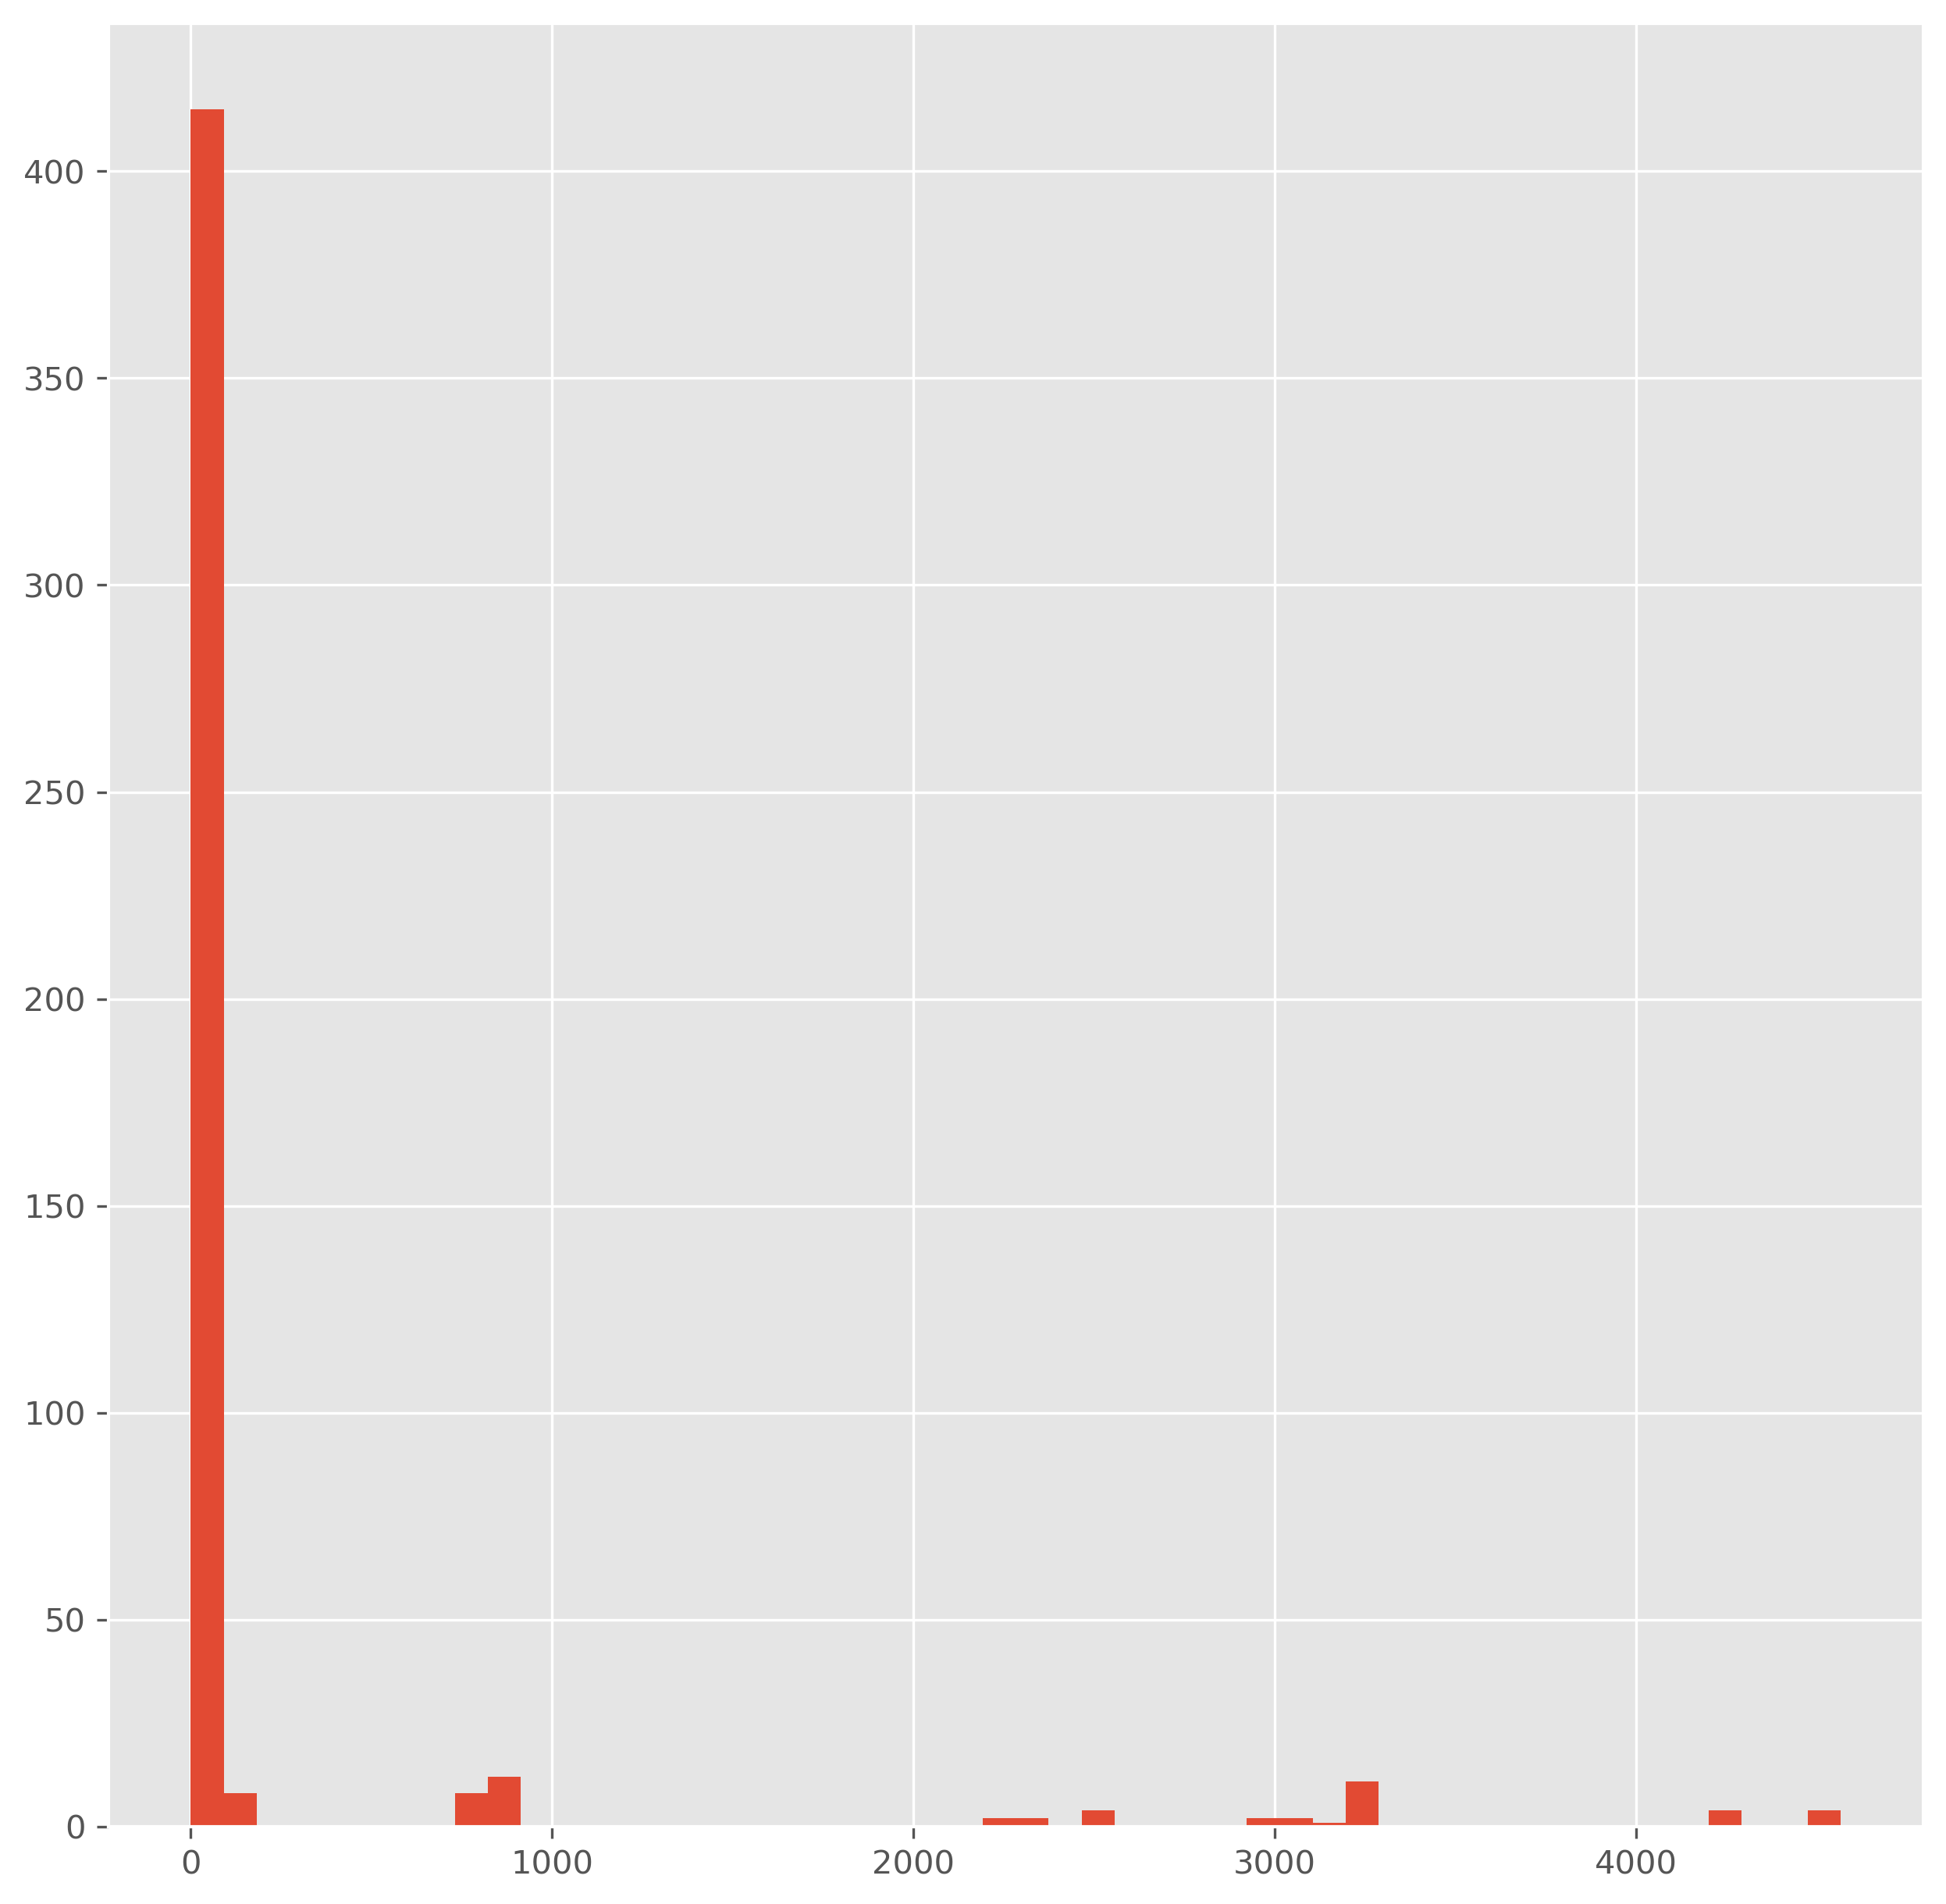

In [13]:
# 3. 각 변수별 missing value 처리
na_info_pre = np.sum(data_train_pre.isna(), axis=0)
print(f"Missing value가 {int(data_train_pre.shape[0] * 0.1)}개 (전체의 10%)보다 많은 변수의 수: "
      f"{np.sum(na_info_pre > int(data_train_pre.shape[0] * 0.1))}")
plt.figure(figsize=(10, 10), dpi=300)
plt.hist(na_info_pre, bins=50)
plt.show()

In [175]:
data_train_rm_na = data_train_pre.loc[:, data_train_pre.columns[na_info_pre <= int(data_train_pre.shape[0] * 0.1)]].copy()
data_train_rm_na

,v001,v002,v003,v004,v005,v007,v008,v009,v010,v011,...,v578,v583,v584,v585,v586,v587,v588,v589,v590,Target
0,2872.0667,2466.5526,2125.6577,989.1645,-2.7843,101.4519,0.1211,1.5088,-0.0097,-0.0038,...,11.6001,0.5026,0.0152,0.0036,3.0002,0.0235,0.0214,0.0068,201.6557,0
1,2925.8098,2541.5765,2234.0984,1281.4768,-3.0935,102.7180,0.1217,1.4794,-0.0188,0.0031,...,11.4859,0.5028,0.0148,0.0039,2.9137,0.0178,0.0086,0.0019,22.1478,0
2,2985.1397,2434.9879,2114.9636,984.9040,-2.3782,104.8891,0.1280,1.3588,0.0228,-0.0053,...,10.0319,0.4963,0.0094,0.0032,1.8878,0.0289,0.0153,0.0053,38.0891,0
3,3205.5703,2354.2453,2156.7551,2348.6859,-2.2280,92.2493,0.1256,1.4360,-0.0083,0.0032,...,14.8545,0.4980,0.0180,0.0046,3.5536,0.0140,0.0150,0.0060,210.6087,0
4,3065.9593,2543.6703,2180.5305,1190.3008,-2.2051,101.0354,0.1260,1.5015,-0.0236,-0.0029,...,9.6399,0.5024,0.0132,0.0032,2.6338,0.0259,0.0114,0.0046,45.1529,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,3073.6235,2464.5108,2183.0635,1508.1410,-1.6021,114.2602,0.1264,1.5427,-0.0142,-0.0035,...,10.0414,0.5001,0.0134,0.0039,2.6179,0.0379,0.0189,0.0070,15.8010,0
4996,2989.2867,2548.8768,NaN,1473.5335,-2.6517,90.8404,0.1220,1.3980,0.0088,-0.0211,...,13.7384,0.4982,0.0131,0.0037,2.6311,0.0395,0.0383,0.0133,56.1007,0
4997,2958.9100,2460.1900,2191.5667,1448.8757,0.9187,104.4511,0.1261,1.4482,-0.0321,0.0048,...,8.4114,0.4990,0.0139,0.0037,2.7790,0.0050,0.0138,0.0047,276.8808,0
4998,3005.3800,2462.1074,2227.6460,1366.8149,-3.2245,98.1569,0.1206,1.5381,-0.0076,0.0022,...,11.4690,0.4944,0.0107,0.0030,2.1679,0.0198,0.0099,0.0027,33.9691,0


In [176]:
max(data_train_pre.isna().sum())

4567

In [ ]:
na_fill_values = data_train_rm_na.mean() 

In [48]:
!pip install impyute

In [129]:
from impyute.imputation.cs import fast_knn
# KNN 학습
np_imputed = fast_knn(data_train_rm_na.values, k=10)

In [131]:
from sklearn.impute import KNNImputer
imputer=KNNImputer(n_neighbors=10)
data_train_filled=imputer.fit_transform(data_train_rm_na)

In [133]:
data_train_filled=pd.DataFrame(data_train_filled)

In [73]:
data_train_filled=pd.DataFrame(np_imputed)

In [134]:
data_train_filled

,0,1,2,3,4,5,6,7,8,9,...,413,414,415,416,417,418,419,420,421,422
0,2872.0667,2466.5526,2125.65770,989.1645,-2.78430,101.4519,0.1211,1.5088,-0.0097,-0.0038,...,11.6001,0.5026,0.0152,0.0036,3.0002,0.0235,0.0214,0.0068,201.6557,0.0
1,2925.8098,2541.5765,2234.09840,1281.4768,-3.09350,102.7180,0.1217,1.4794,-0.0188,0.0031,...,11.4859,0.5028,0.0148,0.0039,2.9137,0.0178,0.0086,0.0019,22.1478,0.0
2,2985.1397,2434.9879,2114.96360,984.9040,-2.37820,104.8891,0.1280,1.3588,0.0228,-0.0053,...,10.0319,0.4963,0.0094,0.0032,1.8878,0.0289,0.0153,0.0053,38.0891,0.0
3,3205.5703,2354.2453,2156.75510,2348.6859,-2.22800,92.2493,0.1256,1.4360,-0.0083,0.0032,...,14.8545,0.4980,0.0180,0.0046,3.5536,0.0140,0.0150,0.0060,210.6087,0.0
4,3065.9593,2543.6703,2180.53050,1190.3008,-2.20510,101.0354,0.1260,1.5015,-0.0236,-0.0029,...,9.6399,0.5024,0.0132,0.0032,2.6338,0.0259,0.0114,0.0046,45.1529,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,3073.6235,2464.5108,2183.06350,1508.1410,-1.60210,114.2602,0.1264,1.5427,-0.0142,-0.0035,...,10.0414,0.5001,0.0134,0.0039,2.6179,0.0379,0.0189,0.0070,15.8010,0.0
4996,2989.2867,2548.8768,2222.06009,1473.5335,-2.65170,90.8404,0.1220,1.3980,0.0088,-0.0211,...,13.7384,0.4982,0.0131,0.0037,2.6311,0.0395,0.0383,0.0133,56.1007,0.0
4997,2958.9100,2460.1900,2191.56670,1448.8757,0.91870,104.4511,0.1261,1.4482,-0.0321,0.0048,...,8.4114,0.4990,0.0139,0.0037,2.7790,0.0050,0.0138,0.0047,276.8808,0.0
4998,3005.3800,2462.1074,2227.64600,1366.8149,-3.22450,98.1569,0.1206,1.5381,-0.0076,0.0022,...,11.4690,0.4944,0.0107,0.0030,2.1679,0.0198,0.0099,0.0027,33.9691,0.0


In [142]:
# 테스트 데이터에도 동일한 값으로 채워넣기 위해 변수로 선언
data_train_filled = data_train_rm_na.fillna(method='ffill').copy()
data_train_filled

,v001,v002,v003,v004,v005,v007,v008,v009,v010,v011,...,v578,v583,v584,v585,v586,v587,v588,v589,v590,Target
0,2872.0667,2466.5526,2125.6577,989.1645,-2.7843,101.4519,0.1211,1.5088,-0.0097,-0.0038,...,11.6001,0.5026,0.0152,0.0036,3.0002,0.0235,0.0214,0.0068,201.6557,0
1,2925.8098,2541.5765,2234.0984,1281.4768,-3.0935,102.7180,0.1217,1.4794,-0.0188,0.0031,...,11.4859,0.5028,0.0148,0.0039,2.9137,0.0178,0.0086,0.0019,22.1478,0
2,2985.1397,2434.9879,2114.9636,984.9040,-2.3782,104.8891,0.1280,1.3588,0.0228,-0.0053,...,10.0319,0.4963,0.0094,0.0032,1.8878,0.0289,0.0153,0.0053,38.0891,0
3,3205.5703,2354.2453,2156.7551,2348.6859,-2.2280,92.2493,0.1256,1.4360,-0.0083,0.0032,...,14.8545,0.4980,0.0180,0.0046,3.5536,0.0140,0.0150,0.0060,210.6087,0
4,3065.9593,2543.6703,2180.5305,1190.3008,-2.2051,101.0354,0.1260,1.5015,-0.0236,-0.0029,...,9.6399,0.5024,0.0132,0.0032,2.6338,0.0259,0.0114,0.0046,45.1529,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,3073.6235,2464.5108,2183.0635,1508.1410,-1.6021,114.2602,0.1264,1.5427,-0.0142,-0.0035,...,10.0414,0.5001,0.0134,0.0039,2.6179,0.0379,0.0189,0.0070,15.8010,0
4996,2989.2867,2548.8768,2183.0635,1473.5335,-2.6517,90.8404,0.1220,1.3980,0.0088,-0.0211,...,13.7384,0.4982,0.0131,0.0037,2.6311,0.0395,0.0383,0.0133,56.1007,0
4997,2958.9100,2460.1900,2191.5667,1448.8757,0.9187,104.4511,0.1261,1.4482,-0.0321,0.0048,...,8.4114,0.4990,0.0139,0.0037,2.7790,0.0050,0.0138,0.0047,276.8808,0
4998,3005.3800,2462.1074,2227.6460,1366.8149,-3.2245,98.1569,0.1206,1.5381,-0.0076,0.0022,...,11.4690,0.4944,0.0107,0.0030,2.1679,0.0198,0.0099,0.0027,33.9691,0


In [143]:
data_train_filled=pd.get_dummies(data_train_filled)

### 전처리된 데이터에 대해 Random Forest 모델 학습

In [74]:
!pip install xgboost

     ---------------------------------------- 70.9/70.9 MB 3.0 MB/s eta 0:00:00


In [96]:
!pip install catboost

     -------------------------------------- 101.0/101.0 MB 3.1 MB/s eta 0:00:00
     ---------------------------------------- 47.0/47.0 kB ? eta 0:00:00


In [99]:
!pip install lightgbm

In [97]:
from catboost import CatBoostClassifier,Pool

In [21]:
from xgboost import XGBClassifier, plot_tree
import lightgbm as lgb

In [144]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

data_train_X = data_train_filled.iloc[:, :-1].copy()
data_train_y = data_train_filled["Target"].copy()

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [145]:
X_train,X_test,y_train,y_test=train_test_split(data_train_X,data_train_y,test_size=0.2)

In [71]:
params={'n_estimators': range(50,150,10),'max_features':range(1,7,3)}

In [72]:
rf=RandomForestClassifier()
rf_gs=GridSearchCV(rf,params,cv=5,verbose=3)
rf_gs.fit(X_train, y_train)

y_pred = rf_gs.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = conf_mat.ravel()
recall = tp / (tp + fn)

print(f"Random Forest 학습 데이터 예측 성능: {recall}")

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END ...max_features=1, n_estimators=50;, score=0.943 total time=   0.1s
[CV 2/5] END ...max_features=1, n_estimators=50;, score=0.941 total time=   0.1s
[CV 3/5] END ...max_features=1, n_estimators=50;, score=0.941 total time=   0.1s
[CV 4/5] END ...max_features=1, n_estimators=50;, score=0.941 total time=   0.1s
[CV 5/5] END ...max_features=1, n_estimators=50;, score=0.941 total time=   0.1s
[CV 1/5] END ...max_features=1, n_estimators=60;, score=0.943 total time=   0.2s
[CV 2/5] END ...max_features=1, n_estimators=60;, score=0.941 total time=   0.2s
[CV 3/5] END ...max_features=1, n_estimators=60;, score=0.941 total time=   0.2s
[CV 4/5] END ...max_features=1, n_estimators=60;, score=0.941 total time=   0.2s
[CV 5/5] END ...max_features=1, n_estimators=60;, score=0.941 total time=   0.2s
[CV 1/5] END ...max_features=1, n_estimators=70;, score=0.943 total time=   0.2s
[CV 2/5] END ...max_features=1, n_estimators=70

In [43]:
parmas={'max_depth':range(1,5,1),'n_estimators':range(100,200,10),'learning_rate':[0.1,0.15,0.2,0.25,0.3]}

model=XGBClassifier()

model_gs=GridSearchCV(model,parmas)
model_gs.fit(X_train,y_train)
y_pred=model_gs.predict(X_test)

KeyboardInterrupt: 

In [94]:
model_gs.best_params_

{'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 190}

In [146]:
model=XGBClassifier(learning_rate= 0.2, max_depth= 2, n_estimators= 500)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [140]:
model=CatBoostClassifier(learning_rate= 0.2, max_depth= 2, n_estimators= 190)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

0:	learn: 0.4897499	total: 4.08ms	remaining: 771ms
1:	learn: 0.3740310	total: 7.8ms	remaining: 733ms
2:	learn: 0.2806817	total: 11.4ms	remaining: 713ms
3:	learn: 0.2395802	total: 14.9ms	remaining: 692ms
4:	learn: 0.2189530	total: 18.6ms	remaining: 687ms
5:	learn: 0.2043066	total: 22.2ms	remaining: 681ms
6:	learn: 0.1868540	total: 25.9ms	remaining: 677ms
7:	learn: 0.1753195	total: 29.7ms	remaining: 675ms
8:	learn: 0.1663153	total: 33.4ms	remaining: 671ms
9:	learn: 0.1612377	total: 37.2ms	remaining: 670ms
10:	learn: 0.1540948	total: 40.9ms	remaining: 666ms
11:	learn: 0.1493107	total: 44.6ms	remaining: 661ms
12:	learn: 0.1452729	total: 48.3ms	remaining: 657ms
13:	learn: 0.1416372	total: 51.9ms	remaining: 653ms
14:	learn: 0.1379081	total: 55.5ms	remaining: 647ms
15:	learn: 0.1336211	total: 59ms	remaining: 642ms
16:	learn: 0.1306950	total: 62.5ms	remaining: 636ms
17:	learn: 0.1277917	total: 66ms	remaining: 631ms
18:	learn: 0.1257801	total: 69.6ms	remaining: 627ms
19:	learn: 0.1239060	total:

In [27]:
from sklearn.metrics import * 

In [147]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       934
           1       0.98      0.82      0.89        66

    accuracy                           0.99      1000
   macro avg       0.98      0.91      0.94      1000
weighted avg       0.99      0.99      0.99      1000



In [148]:
model2=lgb.LGBMClassifier(n_estimators=500,max_depth=2,learning_rate=0.2)
model2.fit(X_train,y_train)
y_pred2=model2.predict(X_test)
print(classification_report(y_test,y_pred2))

[LightGBM] [Info] Number of positive: 237, number of negative: 3763
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013351 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 100654
[LightGBM] [Info] Number of data points in the train set: 4000, number of used features: 422
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.059250 -> initscore=-2.764912
[LightGBM] [Info] Start training from score -2.764912
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       934
           1       0.98      0.77      0.86        66

    accuracy                           0.98      1000
   macro avg       0.98      0.89      0.93      1000
weighte

In [82]:
def plot_feature_importance(importance, names):
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    fi_df.reset_index(drop=True, inplace = True)

    plt.figure(figsize=(10,8))
    sns.barplot(x='feature_importance', y='feature_names', data = fi_df)

    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')
    plt.grid()

    return fi_df

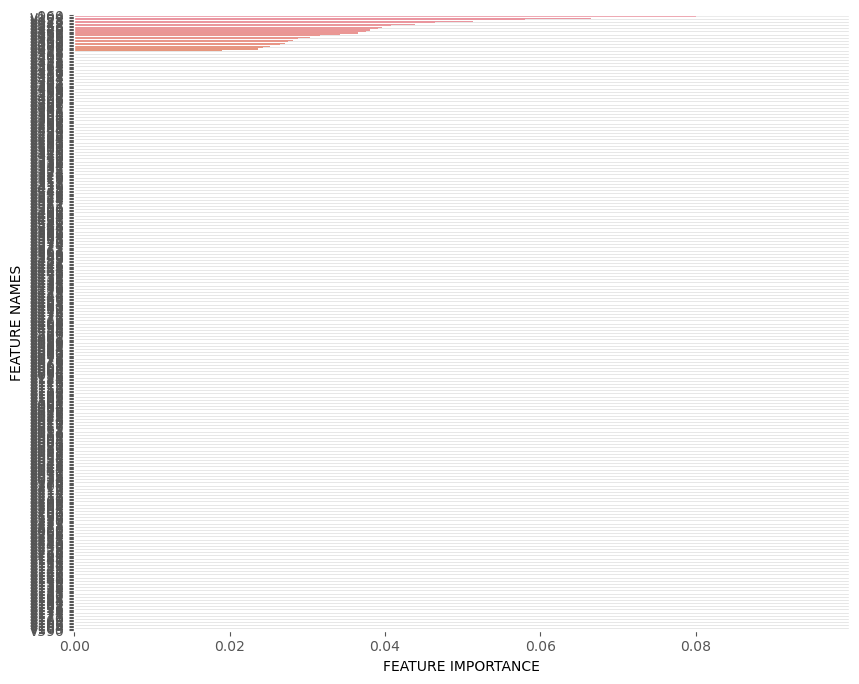

In [83]:
result = plot_feature_importance(model.feature_importances_, X_train.columns)

### test data 로드 후 train data와 동일한 방식으로 전처리


In [124]:
data_test = pd.read_csv("./test.csv")
data_test

,v001,v002,v003,v004,v005,v006,v007,v008,v009,v010,...,v581,v582,v583,v584,v585,v586,v587,v588,v589,v590
0,2978.9752,2563.0671,2181.9470,1528.7875,-1.7003,100.0,95.9096,0.1241,1.4433,-0.0126,...,NaN,82.6383,0.5019,0.0111,0.0022,2.1268,0.0153,0.0040,0.0020,15.5001
1,2935.0984,2651.7589,2213.9108,1611.2391,-1.5025,100.0,96.6405,0.1228,1.5530,0.0018,...,NaN,NaN,0.5008,0.0118,0.0032,2.3159,0.0447,0.0303,0.0098,66.6447
2,3017.8492,2432.2590,2232.0273,1761.4659,-2.5303,100.0,101.2124,0.1237,1.4347,0.0078,...,NaN,NaN,0.5003,0.0103,0.0032,2.0207,0.0063,0.0150,0.0053,214.3042
3,3112.8910,2533.1737,2172.5055,1249.6476,-2.4070,100.0,110.4751,0.1246,1.3770,0.0049,...,NaN,NaN,0.4974,0.0103,0.0025,2.0022,0.0427,0.0221,0.0077,11.2847
4,2963.3112,2517.8249,2236.0586,1639.7662,-1.8329,100.0,109.1073,0.1246,1.3608,0.0267,...,0.0092,68.4728,0.4981,0.0113,0.0030,2.2297,0.0390,0.0245,0.0077,125.2497
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5741,3109.1597,2415.9402,2154.5661,529.8677,-3.2730,100.0,102.8998,0.1224,1.3007,0.0003,...,0.0042,NaN,0.5039,0.0099,0.0027,1.9926,0.0268,0.0070,0.0017,-13.9377
5742,2979.3525,2631.8101,2213.9182,1225.7338,-2.2247,100.0,108.0637,0.1219,1.3442,0.0222,...,0.0057,NaN,0.4986,0.0156,0.0038,3.0918,0.0263,0.0075,0.0029,297.2685
5743,3024.7954,2598.2400,2194.8968,1477.5909,-3.1946,100.0,97.4963,0.1216,1.4925,0.0008,...,NaN,NaN,0.4968,0.0199,0.0049,4.0095,0.0252,0.0198,0.0070,103.9545
5744,3063.8700,2406.8840,2169.2573,845.8857,-2.3900,100.0,106.2731,0.1227,1.5823,-0.0134,...,NaN,NaN,0.4950,0.0065,0.0023,1.2905,0.0279,0.0141,0.0049,23.7067


In [125]:
data_test_X = data_test.loc[:, data_train_X.columns].copy()  # train data 중 학습에 이용한 변수들만 동일하게 test data에서도 선별
data_test_X = data_test_X.fillna(method='ffill').copy()  # train data에서 missing value 처리 시 채워 넣은 값

### _(중요) 제출용 데이터 프레임 생성 및 저장_

In [126]:
y_pred_test = model2.predict(data_test_X)
submission = pd.DataFrame({"ID": np.arange(data_test_X.shape[0]),
                          "Target": y_pred_test})
submission.to_csv("submission.csv", header=True, index=False)